In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# I- Importation et préparation des données

## A- Importation

In [6]:
project = pd.read_csv("../Data/CSV/project_tmp.csv")

## B- Traitement des valeurs manquantes

Suppression de la colonne *nature* comportant plus de 34 000 valeurs manquantes.

In [7]:
project.drop(columns="nature", inplace=True)

In [8]:
project.dropna(inplace=True)

In [9]:
project.shape

(35366, 29)

In [17]:
project.head(2)

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,Community,New_Community,New_Community_Name,Degree,Degree_Centrality,Nb_Publication,Project_Duration,Nb_Orga,country,Cor_Country
0,817296,eDCaseMAN,CLOSED,"Defendable legal cases through an affordable, ...",2018-05-01,2018-09-30,71429.0,50000.0,H2020-EU.2.3.,EIC-SMEInst-2018-2020,...,0,-99,14,0,0.000000,0,152.0,1,1,CH
1,764717,WinWind,CLOSED,Winning social acceptance for wind energy in w...,2017-10-01,2020-03-31,2124462.5,2124462.5,H2020-EU.3.3.,LCE-21-2017,...,1,1,0,427,0.012069,4,912.0,12,6,DE


En supprimant les valeurs nulles nous perdons seulement 15 observations.

## C- Préparation des données

Transformation de la date de signature du projet en année seulement.

In [12]:
project['ecSignatureDate'] = pd.to_datetime(project['ecSignatureDate'])
project['ecSignatureDate'] = project['ecSignatureDate'].dt.year
project['ecSignatureDate'] = project['ecSignatureDate'].astype("int32")

In [13]:
def reduce_size(x):
    return round(x / 1000, 2)

In [67]:
project["ecMaxContribution"] = project["ecMaxContribution"].apply(reduce_size)

In [68]:
project["totalCost"] = project["totalCost"].apply(reduce_size)

---

# II- Premières analyse

In [104]:
population = pd.DataFrame(project['New_Community_Name'].value_counts())
population

,New_Community_Name
0,7886
14,5279
10,4931
1,3538
9,2425
6,1918
5,1781
7,1688
3,1489
8,1033


In [18]:
proportions = project['New_Community_Name'].value_counts(normalize=True).to_frame()
proportions.rename({"New_Community_Name": "Proportion"}, inplace=True, axis=1)

In [19]:
def to_pourcent(x):
    return x * 100

In [20]:
proportions_df = proportions.apply(to_pourcent)
proportions_df

,Proportion
0,22.298253
14,14.926766
10,13.942770
1,10.003959
9,6.856868
6,5.423288
5,5.035910
7,4.772946
3,4.210258
8,2.920884


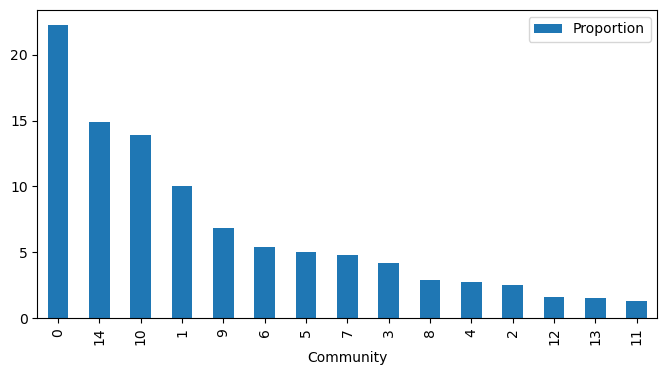

In [63]:
proportions_df.plot(kind="bar", figsize=(8, 4))
plt.xlabel('Community')
plt.show()

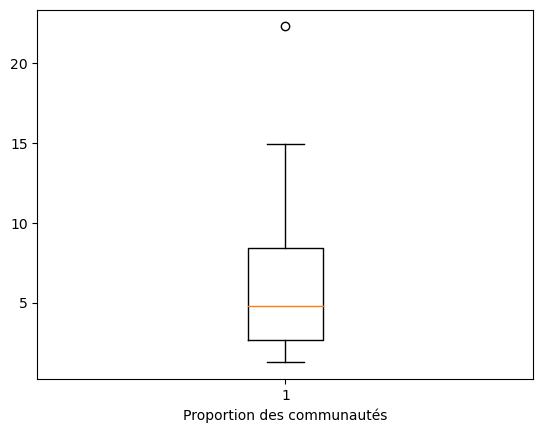

In [64]:
plt.boxplot(proportions_df)
plt.xlabel("Proportion des communautés")
plt.show()

In [65]:
np.median(proportions_df["Proportion"])

4.772945767120964

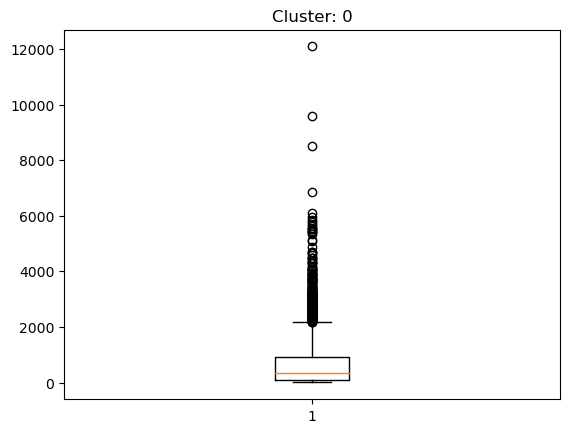

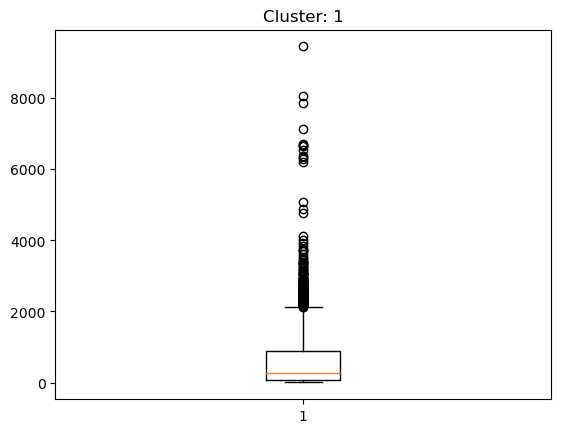

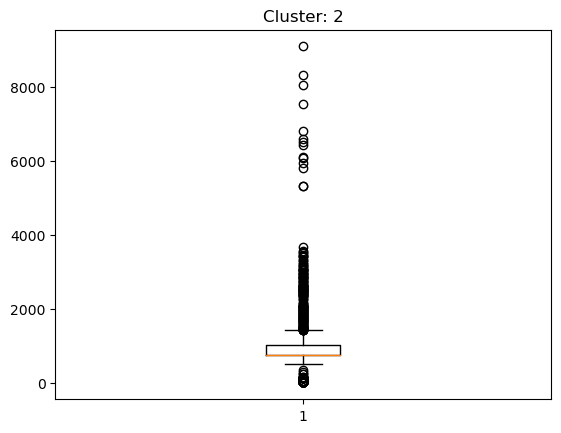

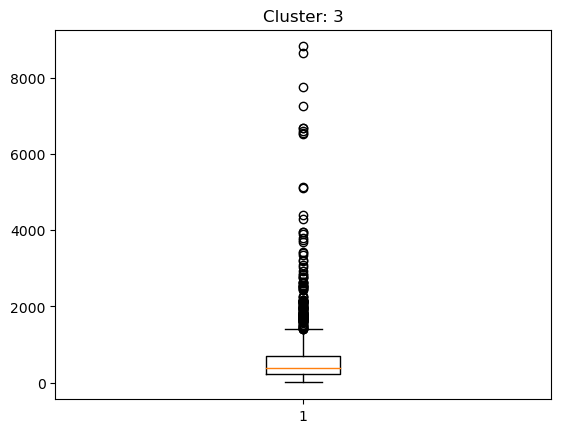

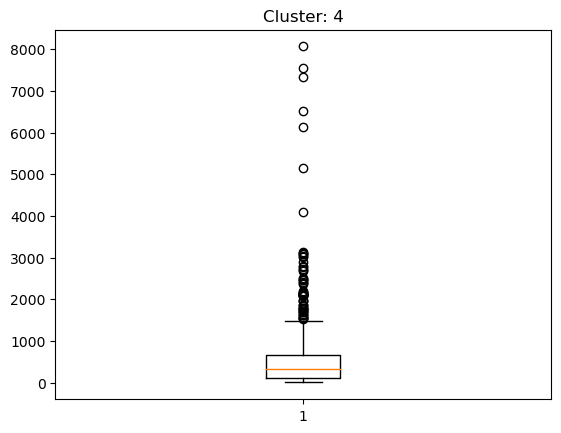

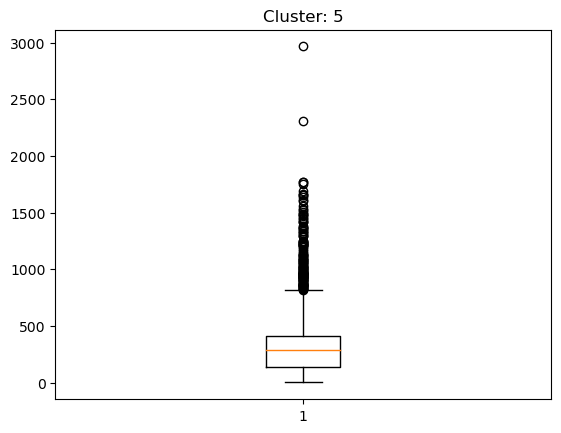

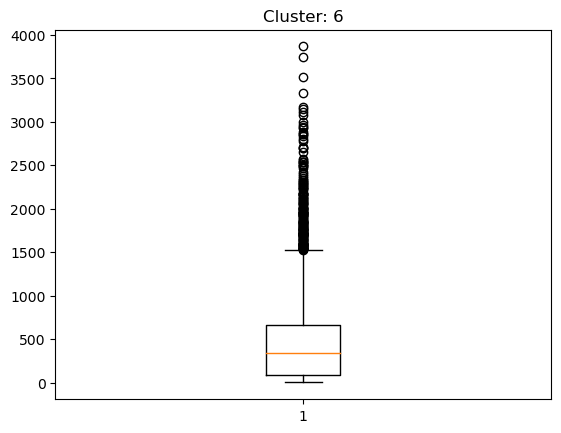

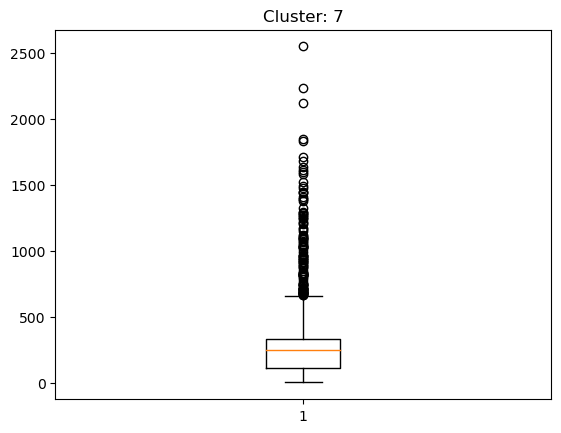

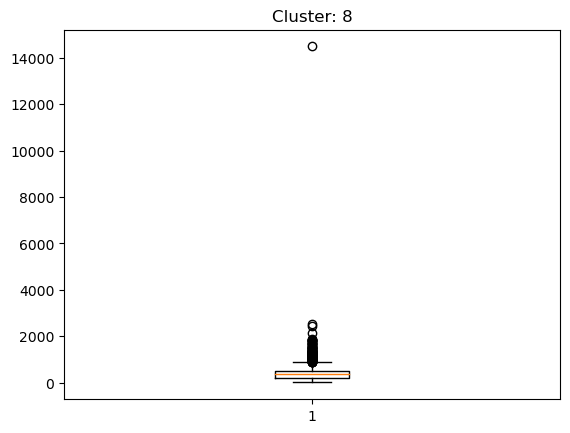

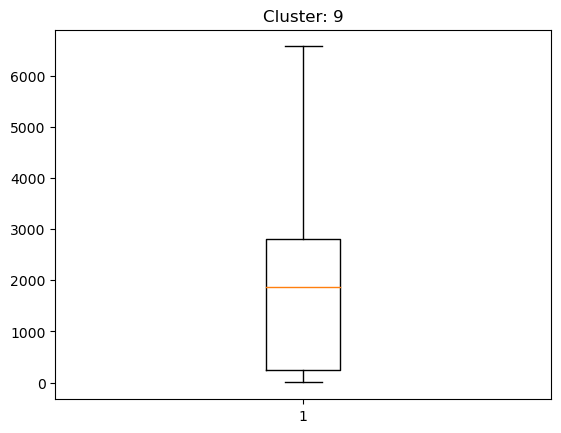

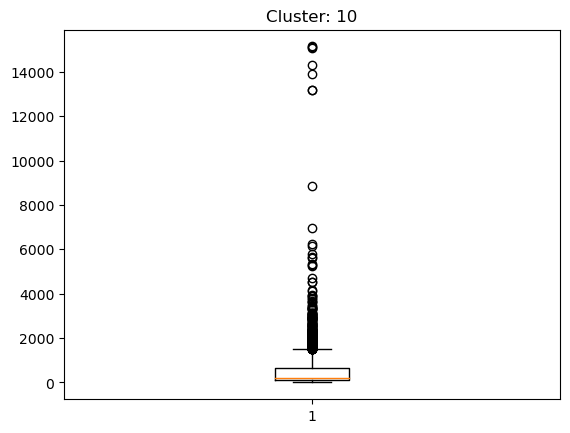

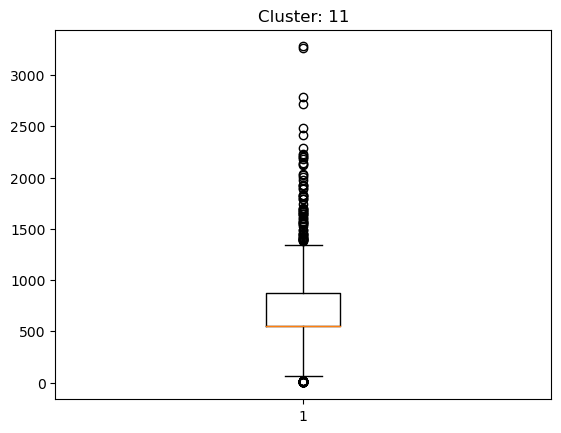

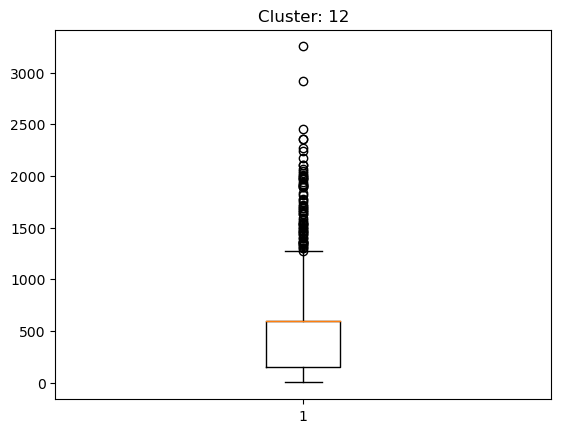

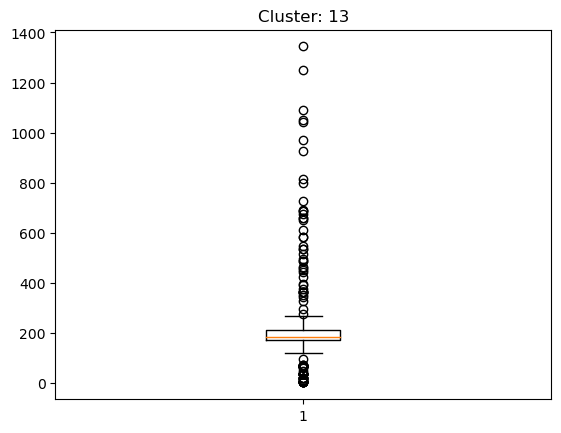

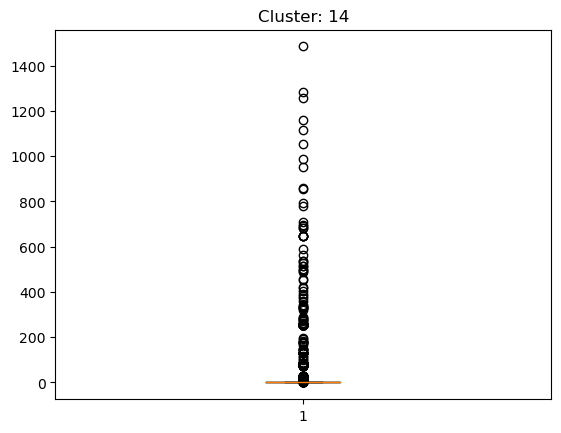

In [22]:
grouped = project.groupby('New_Community_Name')

# Boucle pour afficher les boîtes à moustaches de chaque sous-dataframe
for name, group in grouped:
    plt.boxplot(group['Degree'])
#     sns.boxplot(x=group['Degree'], showfliers=False)
#     sns.stripplot(x=group['Degree'], color="gray", jitter=0.2)
    plt.title(f"Cluster: {name}")
    plt.show()

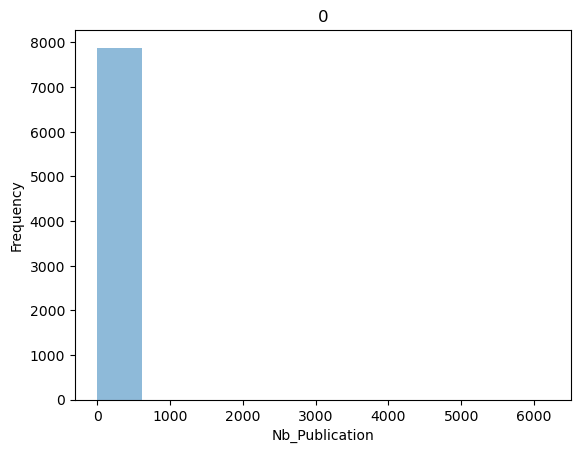

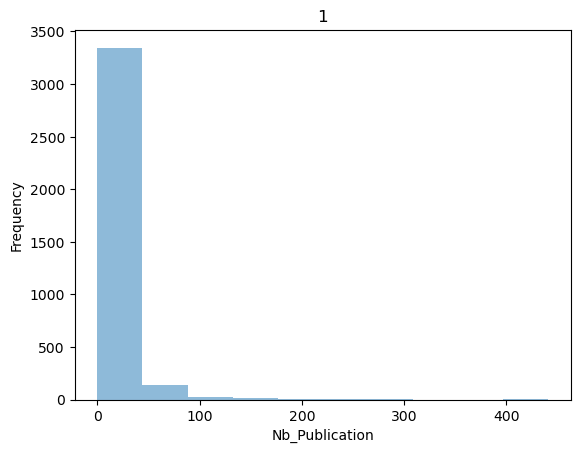

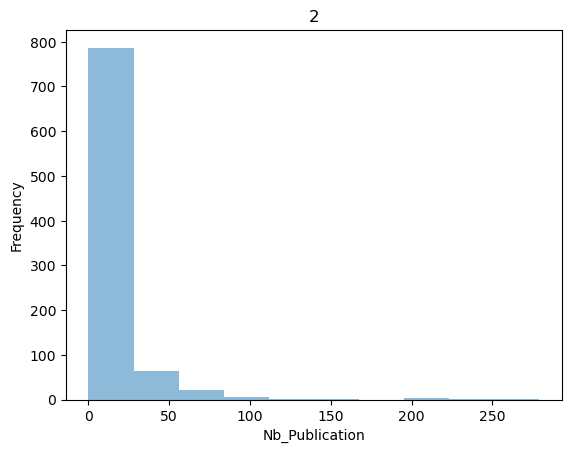

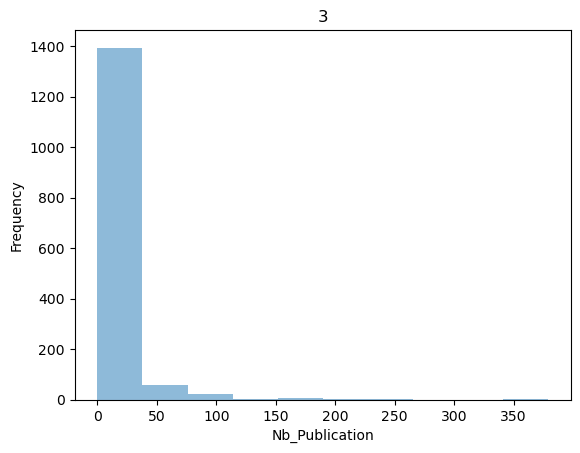

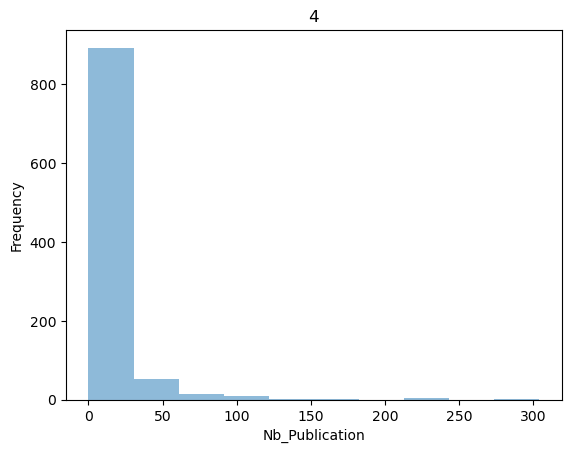

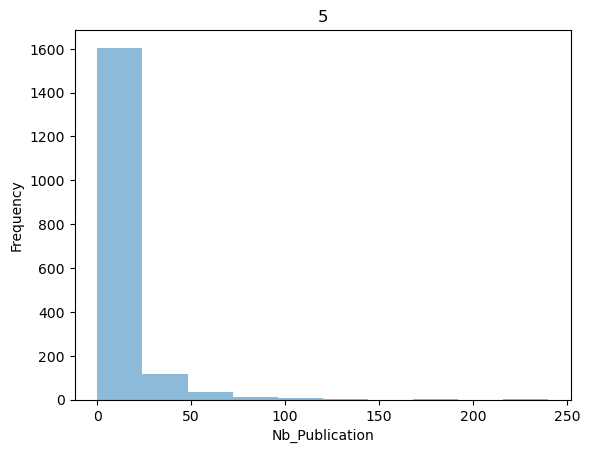

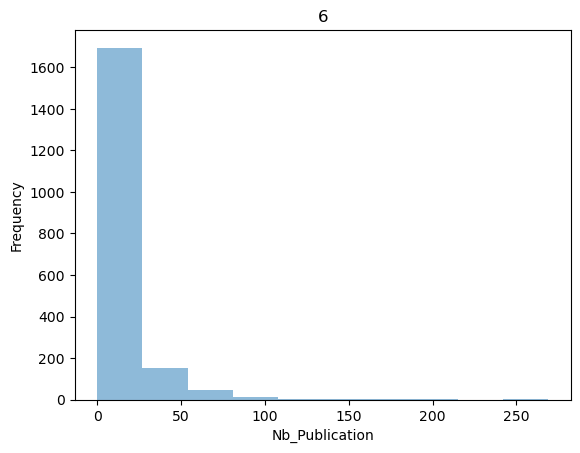

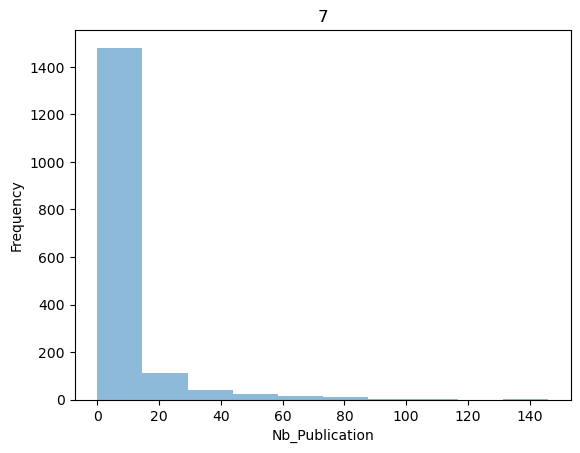

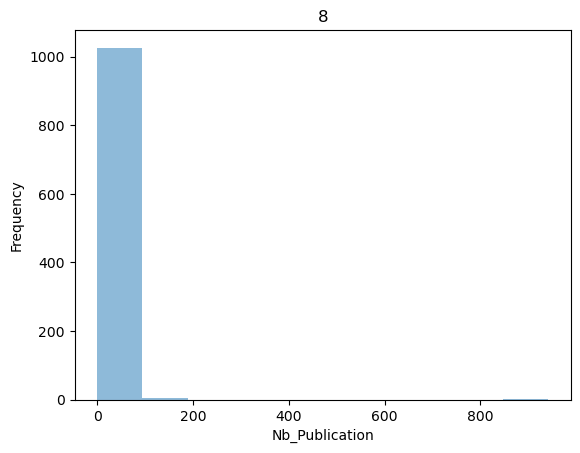

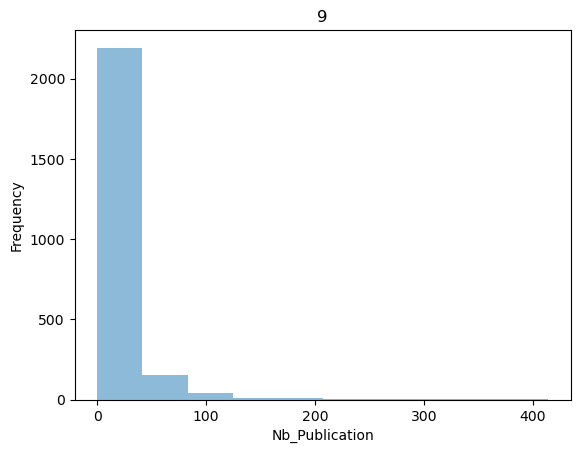

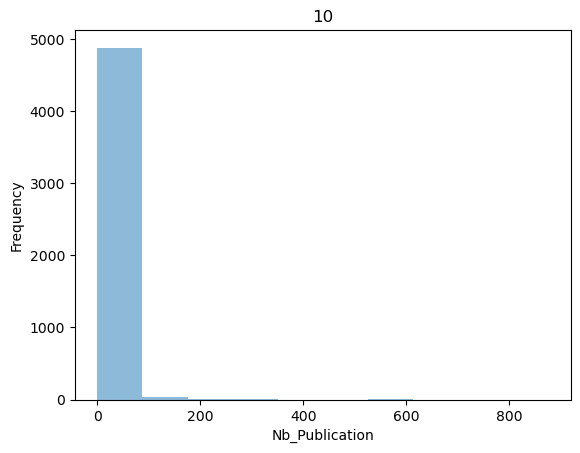

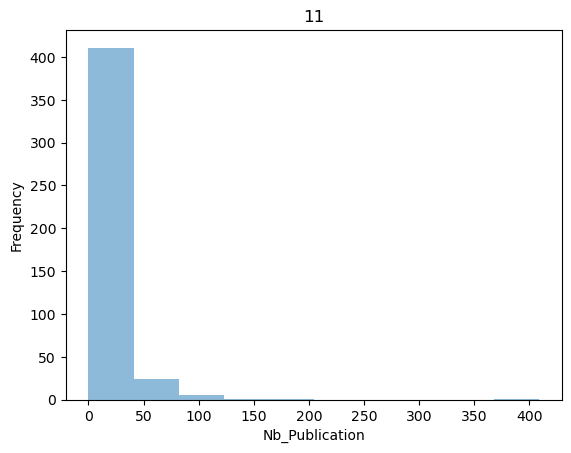

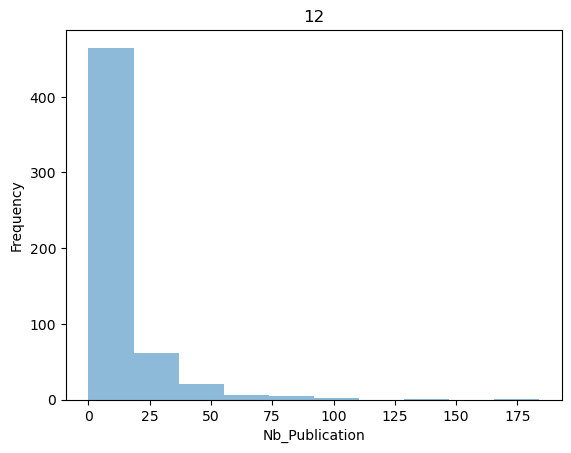

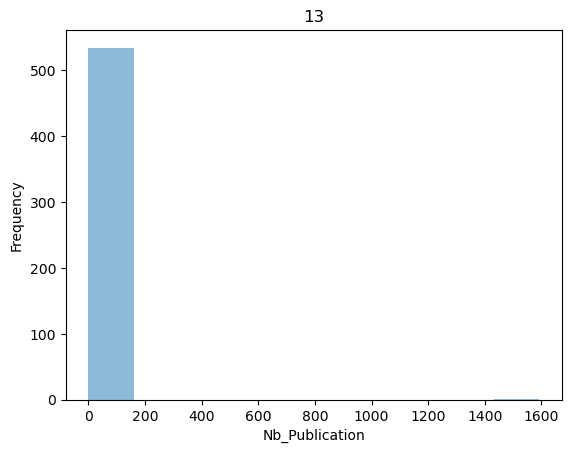

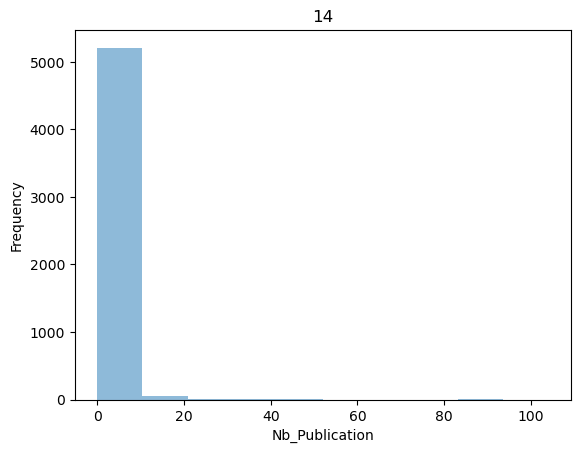

In [23]:
for name, group in grouped:
    group['Nb_Publication'].plot.hist(alpha=0.5)
    plt.xlabel('Nb_Publication')
    plt.title(name)
    plt.show()

In [24]:
#TODO: supprimer les cellules en dessous de celle-ci

In [25]:
project['cost_interval'] = pd.qcut(project['totalCost'], q=10)

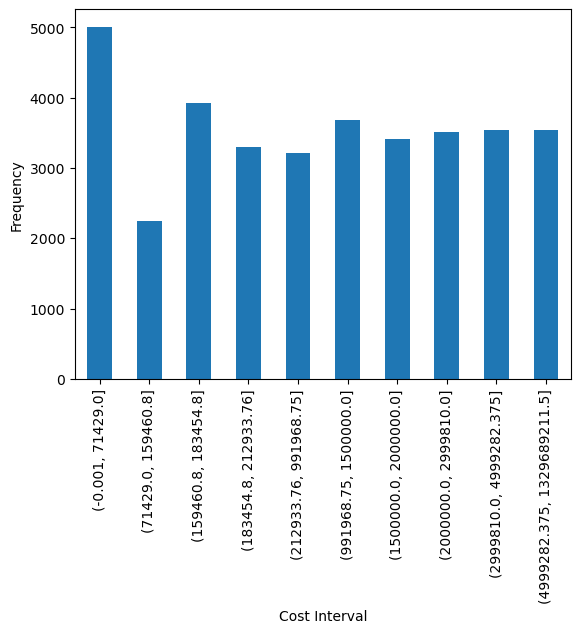

In [26]:
import matplotlib.pyplot as plt

project['cost_interval'].value_counts().sort_index().plot.bar()
plt.xlabel('Cost Interval')
plt.ylabel('Frequency')
plt.show()


Distribution de la durée du projet

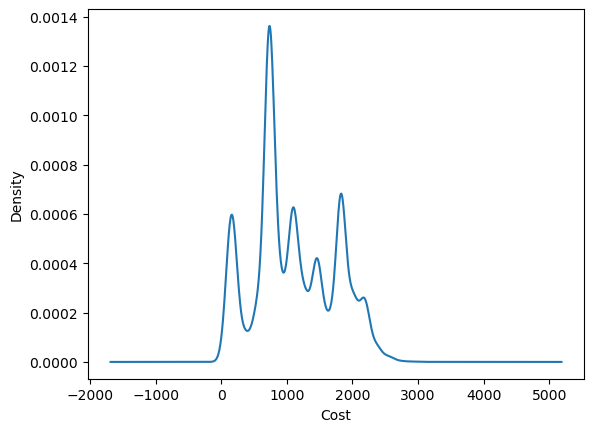

In [27]:
project['Project_Duration'].plot.density()
plt.xlabel('Cost')
plt.ylabel('Density')
plt.show()

### a- Matrice de corrélation

In [30]:
corr_matrix = project.drop(columns=['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 
       'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'objective', 'contentUpdateDate', 'rcn', 'grantDoi']).corr()

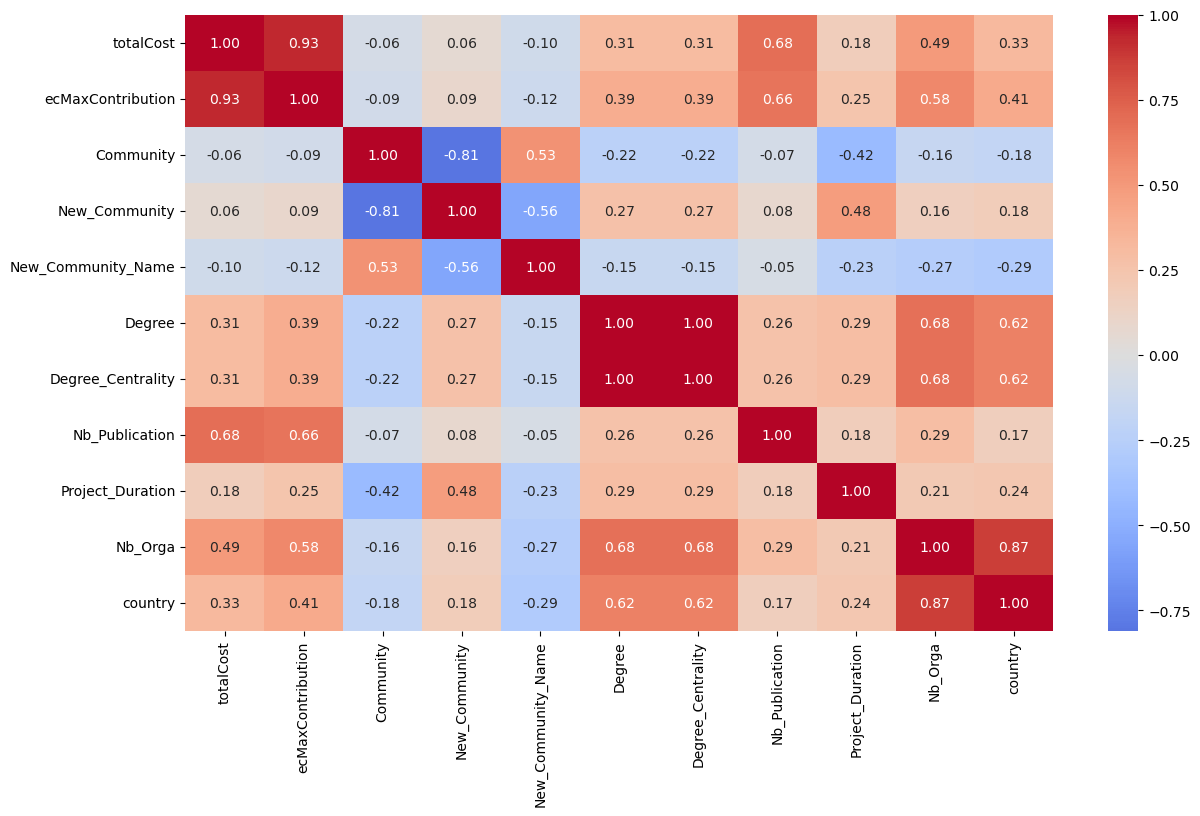

In [31]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.show()

### b- Moyenne des variables quantitatives par communauté

In [75]:
np.mean(project["ecMaxContribution"])

1931.430963071892

In [76]:
np.mean(project["totalCost"])

2352.1212003060923

In [77]:
grouped_df = project.drop(columns=["objective", "Community", "New_Community", "id",
                                   "rcn", 'acronym', 'status', 'title', 'startDate',
                                   'endDate', 'legalBasis', 'topics', 'ecSignatureDate',
                                   'frameworkProgramme', 'masterCall', 'subCall',
                                   'fundingScheme', 'contentUpdateDate',
                                   'grantDoi', "Cor_Country", 'cost_interval']).groupby('New_Community_Name')
stats = grouped_df.agg(['mean']).round(2)
stats.columns = stats.columns.droplevel(1)

In [78]:
stats

,totalCost,ecMaxContribution,Degree,Degree_Centrality,Nb_Publication,Project_Duration,Nb_Orga,country
New_Community_Name,,,,,,,,
0,4442.53,3317.56,643.33,0.02,9.96,1125.85,9.29,4.76
1,2229.86,1899.07,622.96,0.02,9.78,1179.82,6.02,3.40
2,2046.77,1833.71,987.98,0.03,10.57,1262.35,4.48,2.62
3,1880.89,1723.94,632.64,0.02,9.78,1237.25,4.37,2.75
4,1652.31,1571.77,544.37,0.02,9.77,1339.55,2.99,1.92
5,1325.48,1274.38,333.45,0.01,8.42,1233.21,3.08,2.10
6,2074.87,1833.80,536.84,0.02,9.89,1254.30,4.72,2.90
7,1013.87,964.86,274.70,0.01,6.66,1148.29,3.04,2.13
8,1711.12,1540.93,446.09,0.01,9.61,1193.77,3.48,2.25


Focus sur les communautés 0 et 14.

In [105]:
mean_0 = np.mean(project["ecMaxContribution"][project["New_Community_Name"] == 0])
print(round(mean_0, 4))
mean_14 = np.mean(project["ecMaxContribution"][project["New_Community_Name"] == 14])
print(round(mean_14, 4))

3317.5645
589.1447


In [94]:
mean_p_0 = mean_0 / project[project["New_Community_Name"] == 0].shape[0]
print(f"Mean per project for community 0: {round(mean_p_0, 4)}")
mean_p_14 = mean_14 / project[project["New_Community_Name"] == 14].shape[0]
print(f"Mean per project for community 14: {round(mean_p_14, 4)}")

Mean per project for community 0: 0.4207
Mean per project for community 14: 0.1116


### c- Médiane des variables quantitatives par communauté

In [73]:
np.median(project["ecMaxContribution"])

909.935

In [74]:
np.median(project["totalCost"])

991.97

In [136]:
grouped_df = project.drop(columns=["objective", "Community", "New_Community", "id",
                                   "rcn", 'acronym', 'status', 'title', 'startDate',
                                   'endDate', 'legalBasis', 'topics', 'ecSignatureDate',
                                   'frameworkProgramme', 'masterCall', 'subCall',
                                   'fundingScheme', 'contentUpdateDate',
                                   'grantDoi', "Cor_Country", "cost_interval"]).groupby('New_Community_Name')
stats = grouped_df.agg(['median']).round(2)
stats.columns = stats.columns.droplevel(1)

In [137]:
stats

,totalCost,ecMaxContribution,Degree,Degree_Centrality,Nb_Publication,Project_Duration,Nb_Orga,country
New_Community_Name,,,,,,,,
0,1997.70,1950.00,348.5,0.01,2.0,1095.0,7.0,4.0
1,750.65,731.01,254.0,0.01,2.0,1094.0,1.0,1.0
2,507.32,530.15,753.0,0.02,2.5,1095.0,1.0,1.0
3,408.82,350.59,382.0,0.01,2.0,1095.0,1.0,1.0
4,1374.40,1363.60,324.5,0.01,2.0,1338.5,1.0,1.0
5,271.73,271.73,288.0,0.01,2.0,1094.0,1.0,1.0
6,1399.52,1380.00,344.0,0.01,2.0,1095.0,1.0,1.0
7,244.27,244.88,246.5,0.01,1.0,1094.0,1.0,1.0
8,499.95,498.77,373.0,0.01,2.0,1094.0,1.0,1.0


### d- Calcule des modes des variables qualitatives

In [41]:
def get_mode(x):
    return x.value_counts().index[0]

In [45]:
quantitative = project.select_dtypes(include=[np.number]).columns.tolist()
qualitative = project.select_dtypes(exclude=[np.number]).columns.tolist()

On supprime les données ne portant pas d'informations.

In [48]:
# qualitative.remove("Community")
# qualitative.remove("New_Community")
# qualitative.remove("id")
# qualitative.remove("frameworkProgramme")
# qualitative.remove("contentUpdateDate")
# qualitative.remove("grantDoi")
# qualitative.remove("objective")
# qualitative.remove("title")
# qualitative.remove("rcn")

In [51]:
grouped_df = project.groupby('New_Community_Name')
mode_df = grouped_df[qualitative].agg(get_mode).round(2)

In [52]:
mode_df

,acronym,status,title,startDate,endDate,legalBasis,topics,frameworkProgramme,masterCall,subCall,fundingScheme,objective,contentUpdateDate,grantDoi,Cor_Country,cost_interval
New_Community_Name,,,,,,,,,,,,,,,,
0,KAMINLER,CLOSED,Establishing services enhancing the innovation...,2020-01-01,2019-12-31,H2020-EU.1.3.,MSCA-IF-2020,H2020,H2020-LC-SC3-2018-2019-2020,H2020-MSCA-IF-2020,RIA,This action shall provide specialized consulti...,2022-09-27 11:51:15,10.3030/764717,ES,"(4999282.375, 1329689211.5]"
1,INSPIRE,SIGNED,enhancing Innovation and Key Account Managemen...,2021-01-01,2023-12-31,H2020-EU.1.3.,MSCA-IF-2020,H2020,H2020-MSCA-IF-2020,H2020-MSCA-IF-2020,MSCA-IF-EF-ST,"""In the context of innovation-divided Europe a...",2022-09-15 13:18:19,10.3030/751782,ES,"(159460.8, 183454.8]"
2,DISCO,SIGNED,Historical East African Archaeology and Theory...,2015-09-01,2022-09-30,H2020-EU.1.3.,MSCA-IF-2014-EF,H2020,H2020-MSCA-IF-2015,H2020-MSCA-IF-2015,MSCA-IF-EF-ST,"Thousands of species are polyploid. However, t...",2022-09-08 18:26:19,10.3030/833522,UK,"(159460.8, 183454.8]"
3,KAM2SouthPL2,SIGNED,International Network for Terrestrial Research...,2021-01-01,2023-12-31,H2020-EU.1.3.,MSCA-IF-2020,H2020,H2020-MSCA-IF-2020,H2020-MSCA-IF-2020,MSCA-IF-EF-ST,The general objective of the project is to con...,2022-08-24 01:04:15,10.3030/748114,DK,"(183454.8, 212933.76]"
4,MOSAIC,SIGNED,Establishment of a Center of Plant Systems Bio...,2021-01-01,2023-06-30,H2020-EU.1.1.,MSCA-IF-2016,H2020,H2020-MSCA-IF-2016,H2020-MSCA-IF-2016,MSCA-IF-EF-ST,Chinese history was co-constructed by Han (Chi...,2022-08-25 18:32:11,10.3030/883700,DE,"(159460.8, 183454.8]"
5,SPRING,CLOSED,European Technology and Innovation Platform fo...,2021-09-01,2023-08-31,H2020-EU.1.3.,MSCA-IF-2014-EF,H2020,H2020-MSCA-IF-2014,H2020-MSCA-IF-2014,MSCA-IF-EF-ST,BRANDSUS focuses on the study of inclusive gov...,2022-08-09 18:45:54,10.3030/895260,UK,"(159460.8, 183454.8]"
6,PROTECT,SIGNED,Researchers in the Knowledge Triangle,2021-01-01,2023-12-31,H2020-EU.1.3.,MSCA-IF-2020,H2020,H2020-MSCA-IF-2020,H2020-MSCA-IF-2020,MSCA-IF-EF-ST,The Euro Crisis has had a transformative effec...,2022-08-09 19:06:13,10.3030/716923,NL,"(159460.8, 183454.8]"
7,MED4INNO,SIGNED,Innovation Support Network East Mediterranean,2021-09-01,2024-08-31,H2020-EU.1.3.,MSCA-IF-2020,H2020,H2020-MSCA-IF-2020,H2020-MSCA-IF-2020,MSCA-IF-EF-ST,How does globalisation impact the construction...,2022-08-18 10:32:12,10.3030/678783,UK,"(212933.76, 991968.75]"
8,ICFOstepstone,SIGNED,ICFOstepstone PhD Programme for Early-Stage Re...,2021-01-01,2023-03-31,H2020-EU.1.3.,MSCA-IF-2020,H2020,H2020-MSCA-IF-2020,H2020-MSCA-IF-2020,MSCA-IF-EF-ST,According to the World Health Organization can...,2022-08-18 23:54:13,10.3030/845118,CH,"(159460.8, 183454.8]"


### e- Distribution des degré par communauté

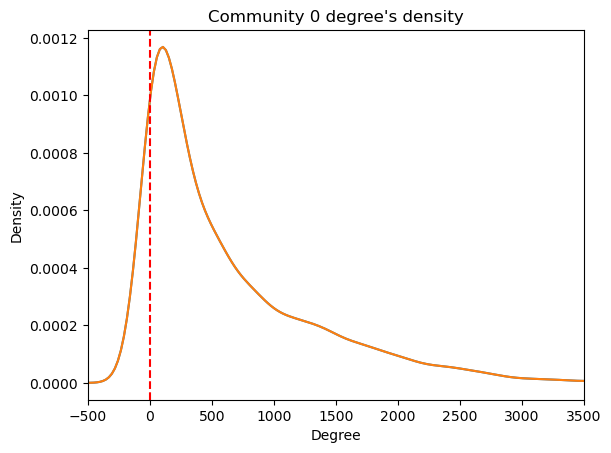

In [133]:
ax = project['Degree'][project["New_Community_Name"] == 0].plot.density()
plt.xlabel('Degree')
plt.xlim((-500, 3500))
plt.ylabel('Density')
plt.title("Community 0 degree's density")
density = project['Degree'][project["New_Community_Name"] == 0].plot.density().get_lines()[0].get_data()[1]
ax.axvline(x=density.mean(), color='red', linestyle='--')
plt.show()

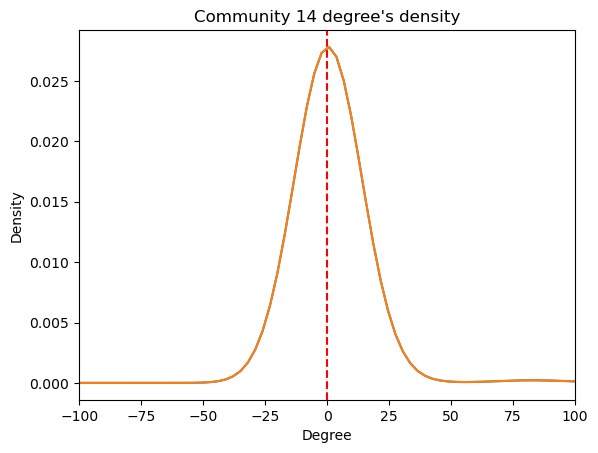

In [130]:
ax = project['Degree'][project["New_Community_Name"] == 14].plot.density()
plt.xlabel('Degree')
plt.xlim((-100, 100))
plt.ylabel('Density')
plt.title("Community 14 degree's density")
density = project['Degree'][project["New_Community_Name"] == 14].plot.density().get_lines()[0].get_data()[1]
ax.axvline(x=np.mean(density), color='red', linestyle='--')
plt.show()